# Exploring the policy dataset and Gathering data on State Policy Changes

The policy data is we have is extremely extensive. In this notebook, the main aim is to reduce the data and extract important information from the data to be used on ahead. 


1. Input data 
    - Columns 
    - What do policy numbers mean 
2. Core Idea 
    - To transform the big data into a new metric. 
    - The new metric being __metric_change__
    - Old data is redundant as it shows stringency on each day but we only want points of change (dates of change) 
3. How metric change was implemented
    - we calculate a diff column and find deltas greater than 1 in it 
4. Final Data 
    - Date of metric change(for a policy)




In [3]:
import pandas as pd
from random import randrange
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]
import math




In [4]:
# # # Policy Data Download to dataset folder
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2021.csv > ../dataset/data_policy_2021.csv
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2020.csv > ../dataset/data_policy_2020.csv

In [14]:
# Read 
df = pd.read_csv('../dataset/data_policy_2020.csv',parse_dates=['Date'])

# Only USA 
df = df[df['CountryCode']=='USA']

# Reset index for convenience
df.reset_index(drop=True)



/usr/local/Caskroom/miniconda/base/envs/602/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


CountryName CountryCode RegionName RegionCode Jurisdiction  \
0      United States         USA        NaN        NaN    NAT_TOTAL   
1      United States         USA        NaN        NaN    NAT_TOTAL   
2      United States         USA        NaN        NaN    NAT_TOTAL   
3      United States         USA        NaN        NaN    NAT_TOTAL   
4      United States         USA        NaN        NaN    NAT_TOTAL   
...              ...         ...        ...        ...          ...   
19027  United States         USA    Wyoming      US_WY  STATE_TOTAL   
19028  United States         USA    Wyoming      US_WY  STATE_TOTAL   
19029  United States         USA    Wyoming      US_WY  STATE_TOTAL   
19030  United States         USA    Wyoming      US_WY  STATE_TOTAL   
19031  United States         USA    Wyoming      US_WY  STATE_TOTAL   

            Date  C1_School closing  C1_Flag  \
0     2020-01-01                0.0      NaN   
1     2020-01-02                0.0      NaN   
2     2020-01-03                0.0      NaN   
3     2020-01-04                0.0      NaN   
4     2020-01-05                0.0      NaN   
...          ...                ...      ...   
19027 2020-12-27                2.0      0.0   
19028 2020-12-28                2.0      0.0   
19029 2020-12-29                2.0      0.0   
19030 2020-12-30                1.0      1.0   
19031 2020-12-31                1.0      1.0   

                                                C1_Notes  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
19027                                                NaN   
19028                                                NaN   
19029                                                NaN   
19030  Jackson schools are hybrid and will continue t...   
19031                                                NaN   

       C2_Workplace closing  ...  StringencyIndex StringencyIndexForDisplay  \
0                       0.0  ...             0.00                      0.00   
1                       0.0  ...             0.00                      0.00   
2                       0.0  ...             0.00                      0.00   
3                       0.0  ...             0.00                      0.00   
4                       0.0  ...             0.00                      0.00   
...                     ...  ...              ...                       ...   
19027                   1.0  ...            68.52                     68.52   
19028                   1.0  ...            68.52                     68.52   
19029                   1.0  ...            68.52                     68.52   
19030                   1.0  ...            61.11                     61.11   
19031                   1.0  ...            61.11                     61.11   

       StringencyLegacyIndex  StringencyLegacyIndexForDisplay  \
0                       0.00                             0.00   
1                       0.00                             0.00   
2                       0.00                             0.00   
3                       0.00                             0.00   
4                       0.00                             0.00   
...                      ...                              ...   
19027                  72.62                            72.62   
19028                  72.62                            72.62   
19029                  72.62                            72.62   
19030                  72.62                            72.62   
19031                  72.62                            72.62   

      GovernmentResponseIndex  GovernmentResponseIndexForDisplay  \
0                        0.00                               

In [15]:
states = df['RegionName'].dropna().unique()

------------------------------------------------

# 1. State Specific Policy Exploration

First we explore policies for individual states before generalizing 


## 1.1 Exploring all the columns present and picking the columns needed columns 
From the big policy dataset, we pick the columns we feel are necessary to create a good model save them 

In [16]:
for i,j in enumerate(df.columns):
    print(i,j,end='\t')

0 CountryName	1 CountryCode	2 RegionName	3 RegionCode	4 Jurisdiction	5 Date	6 C1_School closing	7 C1_Flag	8 C1_Notes	9 C2_Workplace closing	10 C2_Flag	11 C2_Notes	12 C3_Cancel public events	13 C3_Flag	14 C3_Notes	15 C4_Restrictions on gatherings	16 C4_Flag	17 C4_Notes	18 C5_Close public transport	19 C5_Flag	20 C5_Notes	21 C6_Stay at home requirements	22 C6_Flag	23 C6_Notes	24 C7_Restrictions on internal movement	25 C7_Flag	26 C7_Notes	27 C8_International travel controls	28 C8_Notes	29 E1_Income support	30 E1_Flag	31 E1_Notes	32 E2_Debt/contract relief	33 E2_Notes	34 E3_Fiscal measures	35 E3_Notes	36 E4_International support	37 E4_Notes	38 H1_Public information campaigns	39 H1_Flag	40 H1_Notes	41 H2_Testing policy	42 H2_Notes	43 H3_Contact tracing	44 H3_Notes	45 H4_Emergency investment in healthcare	46 H4_Notes	47 H5_Investment in vaccines	48 H5_Notes	49 H6_Facial Coverings	50 H6_Flag	51 H6_Notes	52 H7_Vaccination policy	53 H7_Flag	54 H7_Notes	55 H8_Protection of elderly people	56 H8_Fl

In [17]:
# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]


In [18]:
GOOD_COLUMNS

['C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H6_Facial Coverings',
 'H7_Vaccination policy']

In [25]:
STATE_PICK = states[randrange(len(states))]
print(f'State Picked : {STATE_PICK}')

State Picked : New York


In [26]:
# Selecting only the required state 
target_df = df[df['RegionName']==STATE_PICK]

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date']]

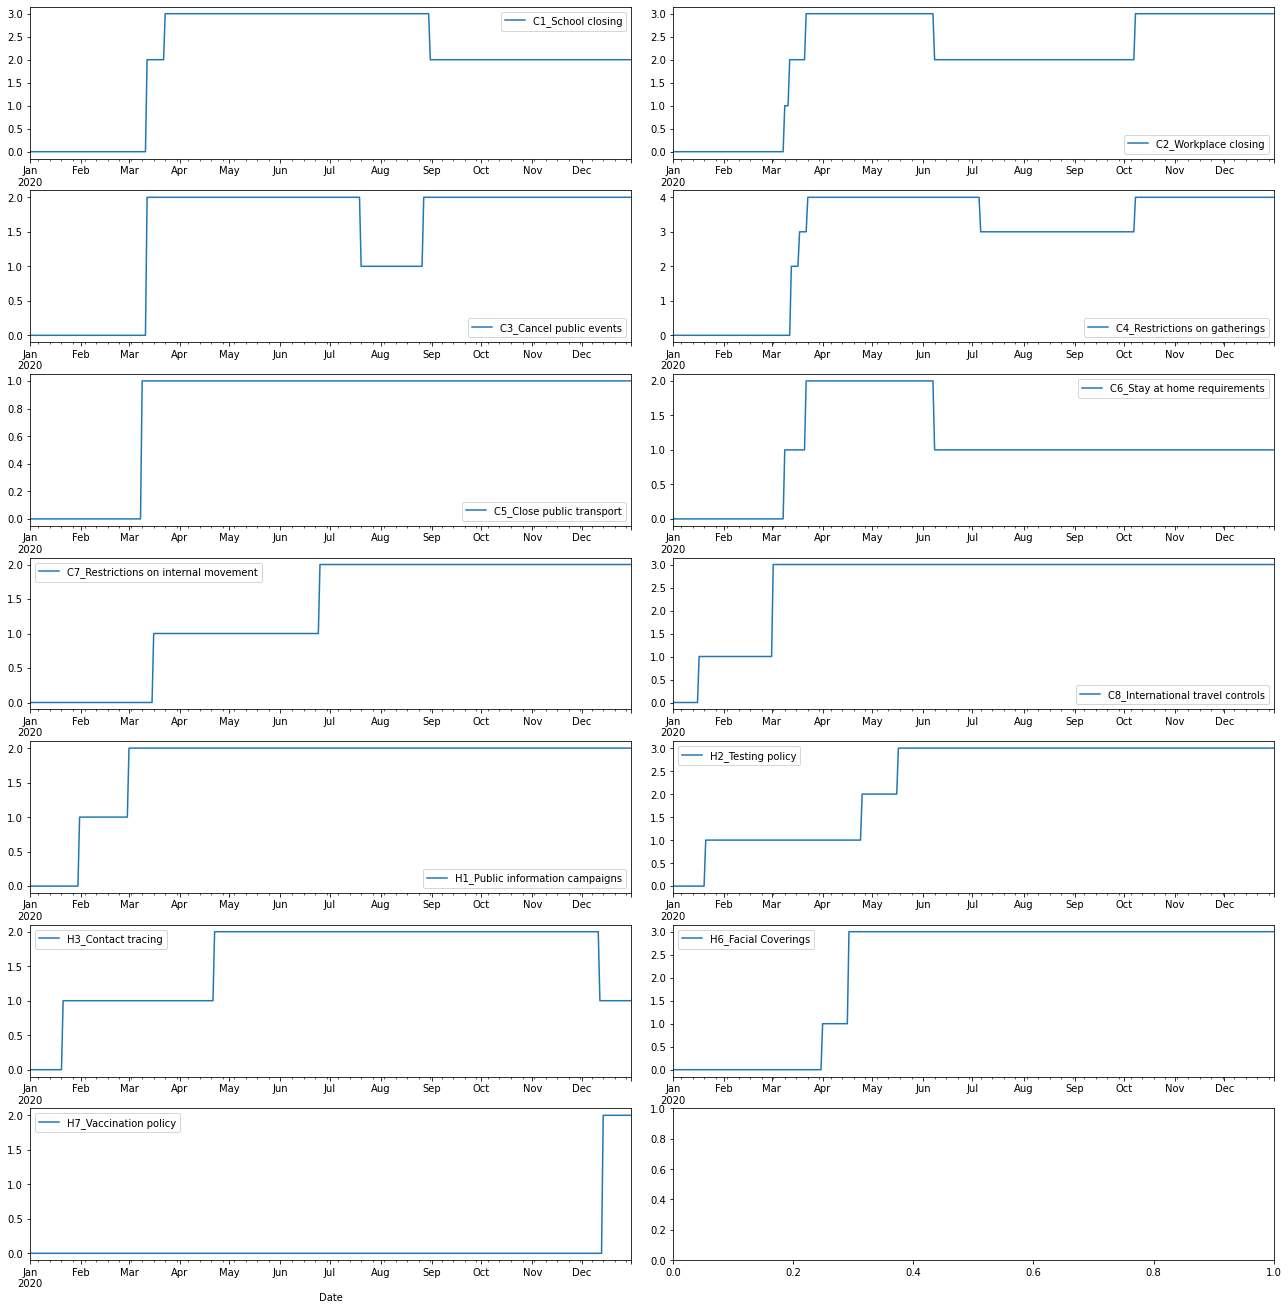

In [21]:
# Displying all columns for good measure 

plt.rcParams['figure.figsize'] = [18, 18]

display_size = len(GOOD_COLUMNS) if len(GOOD_COLUMNS)%2==0 else len(GOOD_COLUMNS) + 1
fig, axes = plt.subplots(nrows=int(display_size/2), ncols=2)

fig.tight_layout()
row_count = 0 
column_count = 0 

for index,column_pick in enumerate(GOOD_COLUMNS):
    target_df.plot(y=column_pick,x='Date' ,ax=axes[row_count,column_count])
    
    column_count = 1 if column_count==0 else 0
    
    if column_count ==0:
        row_count = row_count + 1

## 1.2 Adding Change 
For each of the above plots, we see that we can calculate the date at which the changes occur, we refer to these points in time as __STATE_POLICY_CHANGES__. <br/>

Below we run the operation for extracting the state policy changes from the dataset as separate columns

> also we drop the __Fiscal Measures__ column as it is not very useful for the state. 

|Policy Index|Diff Column|
|--|--|
|1|0|
|1|0|
|1|0|
|2|1|
|2|0|
|2|0|
|3|1|
|3|0|
|1|-2|
|1|0|

In [22]:
OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
    print('\n')
    # isolating the column in question 
    df_process = target_df[[column_pick,'Date']]
    
    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();
    
    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()
    print(f'Unique Values in column {column_pick}: {change_values}')
    
    # Cleaning Values : Removing 0 and nan 
    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)
            
    print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')
    
    
    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        output_row = {}
        date_implement = target_df.loc[elemnts]['Date'].values[0]
        policy = column_pick
        metric_change = unique_change_value_iterator
        output_row['date_implement'] = date_implement
        output_row['policy'] = policy
        output_row['metric_change'] = metric_change
        output_row['state'] = STATE_PICK
        
        
        OUTPUT_DATABASE.append(output_row)
        

        
    



Unique Values in column C1_School closing: [nan, 0.0, 2.0, 1.0, -1.0]
Unique Cleaned Values in column C1_School closing: [2.0, 1.0, -1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [1.0, -1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, 2.0, -1.0, 1.0]
Unique Cleaned Values in column C3_Cancel public events: [2.0, -1.0, 1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 2.0, 1.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [2.0, 1.0, -1.0]


Unique Values in column C5_Close public transport: [nan, 0.0, 1.0]
Unique Cleaned Values in column C5_Close public transport: [1.0]


Unique Values in column C6_Stay at home requirements: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [1.0, -1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, 1.0]
Unique Cleaned Values in column C7_Restric

In [23]:
STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
STATE_POLICY_CHANGE

date_implement                                policy  metric_change  \
0      2020-03-12                     C1_School closing            2.0   
1      2020-03-23                     C1_School closing            1.0   
2      2020-08-31                     C1_School closing           -1.0   
3      2020-03-09                  C2_Workplace closing            1.0   
4      2020-06-08                  C2_Workplace closing           -1.0   
5      2020-03-12               C3_Cancel public events            2.0   
6      2020-07-20               C3_Cancel public events           -1.0   
7      2020-08-27               C3_Cancel public events            1.0   
8      2020-03-13         C4_Restrictions on gatherings            2.0   
9      2020-03-18         C4_Restrictions on gatherings            1.0   
10     2020-07-06         C4_Restrictions on gatherings           -1.0   
11     2020-03-09             C5_Close public transport            1.0   
12     2020-03-09          C6_Stay at home requirements            1.0   
13     2020-06-08          C6_Stay at home requirements           -1.0   
14     2020-03-16  C7_Restrictions on internal movement            1.0   
15     2020-01-17      C8_International travel controls            1.0   
16     2020-03-02      C8_International travel controls            2.0   
17     2020-01-31       H1_Public information campaigns            1.0   
18     2020-01-21                     H2_Testing policy            1.0   
19     2020-01-21                    H3_Contact tracing            1.0   
20     2020-12-12                    H3_Contact tracing           -1.0   
21     2020-04-01                   H6_Facial Coverings            1.0   
22     2020-04-17                   H6_Facial Coverings            2.0   
23     2020-12-14                 H7_Vaccination policy            2.0   

       state  
0   New York  
1   New York  
2   New York  
3   New York  
4   New York  
5   New York  
6   New York  
7   New York  
8   New York  
9   New York  
10  New York  
11  New York  
12  New York  
13  New York  
14  New York  
15  New York  
16  New York  
17  New York  
18  New York  
19  New York  
20  New York  
21  New York  
22  New York  
23  New York

-------------------------

# 2. IMPLEMENTING FOR ALL STATES TO GET `STATE_POLICY_CHANGE` DATASET

In [24]:
# The main output variable ------------------------
STATE_POLICY_CHANGE_EXPORT = [] 

# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]



for STATE_PICK in states[:30]: 
    
    print(f'Working on State : {STATE_PICK}')
    
    # Selecting only the required state 
    target_df = df[df['RegionName']==STATE_PICK]

    # Sorting by date
    target_df = target_df.sort_values(by='Date')

    # Removing all the colmuns except GOODCOLUMNS and Date 
    target_df = target_df[GOOD_COLUMNS + ['Date']]
    
    OUTPUT_DATABASE = []

    for index,column_pick in enumerate(GOOD_COLUMNS):
        print('\n')
        # isolating the column in question 
        df_process = target_df[[column_pick,'Date']]

        # Finding change and saving them as a diff column
        target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

        # Finding unique values in the diff column
        change_values = target_df[f'{column_pick}_diff'].unique().tolist()
        print(f'Unique Values in column {column_pick}: {change_values}')

        # Cleaning Values : Removing 0 and nan 
        change_values_cleaned = []
        for i in change_values:
            if i and not math.isnan(i):
                change_values_cleaned.append(i)

        print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')


        for unique_change_value_iterator in change_values_cleaned:
            # Getting the index of change 
            elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

            # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
            for each_instance_of_elem in elemnts:
                output_row = {}
                date_implement = target_df.loc[[each_instance_of_elem]]['Date'].values[0]
                metric_value = target_df.loc[[each_instance_of_elem]][column_pick].values[0]
                policy = column_pick
                metric_change = unique_change_value_iterator
                output_row['date_implement'] = date_implement
                output_row['policy'] = policy
                output_row['metric_change'] = metric_change
                output_row['metric_value'] = metric_value
                output_row['state'] = STATE_PICK


                OUTPUT_DATABASE.append(output_row)
        
    STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
    STATE_POLICY_CHANGE_EXPORT.append(STATE_POLICY_CHANGE)
        
    


Working on State : Alaska


Unique Values in column C1_School closing: [nan, 0.0, 1.0, 2.0]
Unique Cleaned Values in column C1_School closing: [1.0, 2.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [1.0, -1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [1.0, -1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 3.0, 1.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [3.0, 1.0, -1.0]


Unique Values in column C5_Close public transport: [nan, 0.0, 1.0, -2.0]
Unique Cleaned Values in column C5_Close public transport: [1.0, -2.0]


Unique Values in column C6_Stay at home requirements: [nan, 0.0, 2.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [2.0, -1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Value

Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0]
Working on State : Connecticut


Unique Values in column C1_School closing: [nan, 0.0, 2.0, 1.0, -1.0]
Unique Cleaned Values in column C1_School closing: [2.0, 1.0, -1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [1.0, -1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, 2.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [2.0, -1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 2.0, 1.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [2.0, 1.0, -1.0]


Unique Values in column C5_Close public transport: [nan, 0.0, 1.0]
Unique Cleaned Values in column C5_Close public transport: [1.0]


Unique Values in column C6_Stay at home requirements: [nan, 0.0, 1.0]
Unique Cleaned Values in column C6_Stay at home requireme

Unique Values in column C8_International travel controls: [nan, 0.0, 3.0]
Unique Cleaned Values in column C8_International travel controls: [3.0]


Unique Values in column H1_Public information campaigns: [nan, 0.0, 1.0]
Unique Cleaned Values in column H1_Public information campaigns: [1.0]


Unique Values in column H2_Testing policy: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column H2_Testing policy: [1.0, -1.0]


Unique Values in column H3_Contact tracing: [nan, 0.0, 1.0]
Unique Cleaned Values in column H3_Contact tracing: [1.0]


Unique Values in column H6_Facial Coverings: [nan, 0.0, 1.0]
Unique Cleaned Values in column H6_Facial Coverings: [1.0]


Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0]
Working on State : Iowa


Unique Values in column C1_School closing: [nan, 0.0, 1.0, 2.0, -1.0]
Unique Cleaned Values in column C1_School closing: [1.0, 2.0, -1.0]


Unique Values in column C2_Workplace closing


Unique Values in column C3_Cancel public events: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [1.0, -1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 3.0, 1.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [3.0, 1.0, -1.0]


Unique Values in column C5_Close public transport: [nan, 0.0, 1.0]
Unique Cleaned Values in column C5_Close public transport: [1.0]


Unique Values in column C6_Stay at home requirements: [nan, 0.0, 2.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [2.0, -1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, 1.0]
Unique Cleaned Values in column C7_Restrictions on internal movement: [1.0]


Unique Values in column C8_International travel controls: [nan, 0.0, 3.0]
Unique Cleaned Values in column C8_International travel controls: [3.0]


Unique Values in column H1_Public information campaigns: [nan, 0.0, 1.0]
Unique Cleaned Values in colum



Unique Values in column H3_Contact tracing: [nan, 0.0, 1.0]
Unique Cleaned Values in column H3_Contact tracing: [1.0]


Unique Values in column H6_Facial Coverings: [nan, 0.0, 1.0]
Unique Cleaned Values in column H6_Facial Coverings: [1.0]


Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0]
Working on State : Maine


Unique Values in column C1_School closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C1_School closing: [1.0, -1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, 1.0, 2.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [1.0, 2.0, -1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [1.0, -1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 4.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [4.0, -1.0]


Unique Values in column C5_Close 



Unique Values in column H3_Contact tracing: [nan, 0.0, 1.0]
Unique Cleaned Values in column H3_Contact tracing: [1.0]


Unique Values in column H6_Facial Coverings: [nan, 0.0, 1.0, 2.0]
Unique Cleaned Values in column H6_Facial Coverings: [1.0, 2.0]


Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0]
Working on State : North Dakota


Unique Values in column C1_School closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C1_School closing: [1.0, -1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [1.0, -1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, 1.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [1.0, -1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 2.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [2.0]


Unique Values in column C5_Close publi

In [13]:
STATE_POLICY_CHANGE_EXPORT_DF = pd.concat(STATE_POLICY_CHANGE_EXPORT)

In [14]:

STATE_POLICY_CHANGE_EXPORT_DF

date_implement                   policy  metric_change  metric_value  \
0      2021-01-19        C1_School closing           -1.0           2.0   
1      2021-03-15        C1_School closing           -1.0           1.0   
2      2021-07-10     C2_Workplace closing           -1.0           0.0   
3      2021-08-05     C2_Workplace closing            1.0           1.0   
4      2021-03-08  C3_Cancel public events           -1.0           1.0   
..            ...                      ...            ...           ...   
8      2021-07-18        H2_Testing policy           -1.0           2.0   
9      2021-07-19        H2_Testing policy            1.0           3.0   
10     2021-01-13    H7_Vaccination policy            2.0           3.0   
11     2021-03-29    H7_Vaccination policy            1.0           4.0   
12     2021-04-05    H7_Vaccination policy            1.0           5.0   

       state  
0     Alaska  
1     Alaska  
2     Alaska  
3     Alaska  
4     Alaska  
..       ...  
8   Nebraska  
9   Nebraska  
10  Nebraska  
11  Nebraska  
12  Nebraska  

[510 rows x 5 columns]

In [15]:
# Creating the output csv 
# STATE_POLICY_CHANGE_EXPORT_DF.to_csv('../outputs/processed_2021_statePolChange.csv')

----------------

# Country wide policies 

In [16]:
# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]

In [17]:
# Selecting only the required state 
target_df = df[df['Jurisdiction']=='NAT_TOTAL']

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date']]

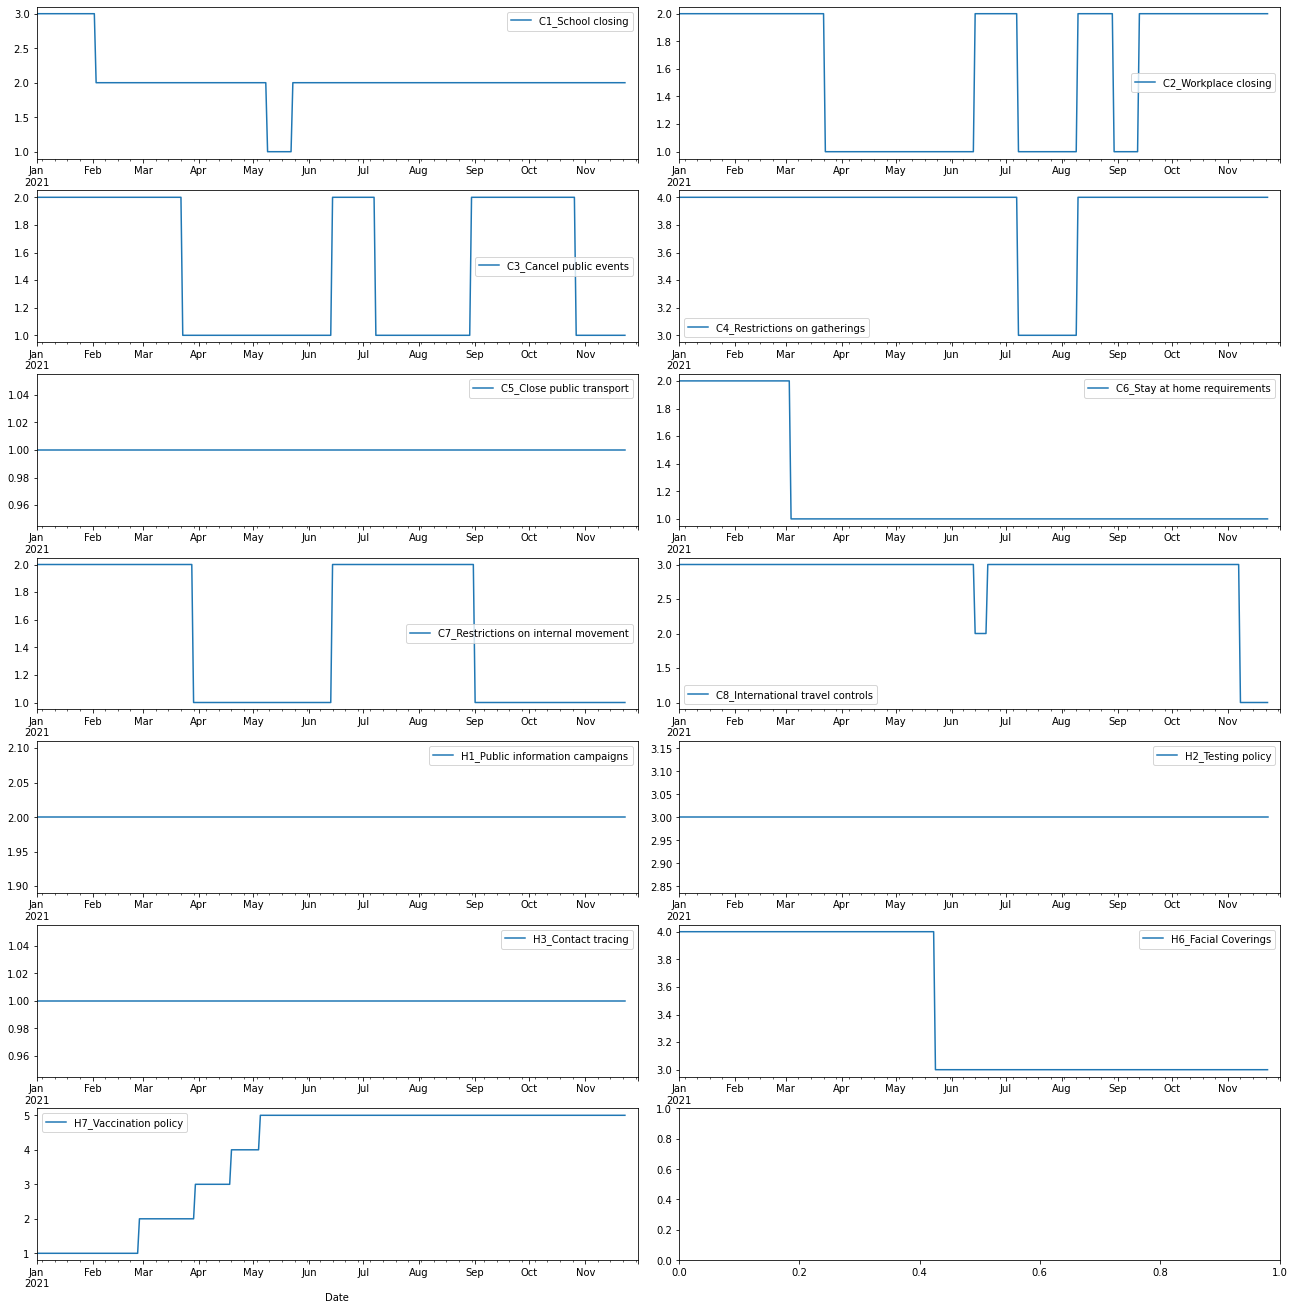

In [18]:
# Displying all columns for good measure 

plt.rcParams['figure.figsize'] = [18, 18]

display_size = len(GOOD_COLUMNS) if len(GOOD_COLUMNS)%2==0 else len(GOOD_COLUMNS) + 1
fig, axes = plt.subplots(nrows=int(display_size/2), ncols=2)

fig.tight_layout()
row_count = 0 
column_count = 0 

for index,column_pick in enumerate(GOOD_COLUMNS):
    target_df.plot(y=column_pick,x='Date' ,ax=axes[row_count,column_count])
    
    column_count = 1 if column_count==0 else 0
    
    if column_count ==0:
        row_count = row_count + 1

In [19]:
OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
    print('\n')
    # isolating the column in question 
    df_process = target_df[[column_pick,'Date']]

    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()
    print(f'Unique Values in column {column_pick}: {change_values}')

    # Cleaning Values : Removing 0 and nan 
    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)

    print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')


    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()
        print(f'-----elemnts:{elemnts}')

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        
        for each_instance_of_elem in elemnts:
            output_row = {}
            date_implement = target_df.loc[[each_instance_of_elem]]['Date'].values[0]
            metric_value = target_df.loc[[each_instance_of_elem]][column_pick].values[0]
            policy = column_pick
            metric_change = unique_change_value_iterator
            output_row['date_implement'] = date_implement
            output_row['policy'] = policy
            output_row['metric_change'] = metric_change
            output_row['metric_value'] = metric_value
            output_row['state'] = 'national'


            OUTPUT_DATABASE.append(output_row)

NAT_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)


    





Unique Values in column C1_School closing: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C1_School closing: [-1.0, 1.0]
-----elemnts:[83867, 83962]
-----elemnts:[83976]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C2_Workplace closing: [-1.0, 1.0]
-----elemnts:[83915, 84022, 84075]
-----elemnts:[83998, 84055, 84089]


Unique Values in column C3_Cancel public events: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C3_Cancel public events: [-1.0, 1.0]
-----elemnts:[83915, 84022, 84133]
-----elemnts:[83998, 84075]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [-1.0, 1.0]
-----elemnts:[84022]
-----elemnts:[84055]


Unique Values in column C5_Close public transport: [nan, 0.0]
Unique Cleaned Values in column C5_Close public transport: []


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned 

In [20]:
# NAT_POLICY_CHANGE.to_csv('../outputs/processed_2021_natPolChange.csv')

In [21]:
NAT_POLICY_CHANGE

date_implement                                policy  metric_change  \
0      2021-02-03                     C1_School closing           -1.0   
1      2021-05-09                     C1_School closing           -1.0   
2      2021-05-23                     C1_School closing            1.0   
3      2021-03-23                  C2_Workplace closing           -1.0   
4      2021-07-08                  C2_Workplace closing           -1.0   
5      2021-08-30                  C2_Workplace closing           -1.0   
6      2021-06-14                  C2_Workplace closing            1.0   
7      2021-08-10                  C2_Workplace closing            1.0   
8      2021-09-13                  C2_Workplace closing            1.0   
9      2021-03-23               C3_Cancel public events           -1.0   
10     2021-07-08               C3_Cancel public events           -1.0   
11     2021-10-27               C3_Cancel public events           -1.0   
12     2021-06-14               C3_Cancel public events            1.0   
13     2021-08-30               C3_Cancel public events            1.0   
14     2021-07-08         C4_Restrictions on gatherings           -1.0   
15     2021-08-10         C4_Restrictions on gatherings            1.0   
16     2021-03-04          C6_Stay at home requirements           -1.0   
17     2021-03-29  C7_Restrictions on internal movement           -1.0   
18     2021-09-01  C7_Restrictions on internal movement           -1.0   
19     2021-06-14  C7_Restrictions on internal movement            1.0   
20     2021-06-14      C8_International travel controls           -1.0   
21     2021-06-21      C8_International travel controls            1.0   
22     2021-11-08      C8_International travel controls           -2.0   
23     2021-05-23                   H6_Facial Coverings           -1.0   
24     2021-02-27                 H7_Vaccination policy            1.0   
25     2021-03-30                 H7_Vaccination policy            1.0   
26     2021-04-19                 H7_Vaccination policy            1.0   
27     2021-05-05                 H7_Vaccination policy            1.0   

    metric_value     state  
0            2.0  national  
1            1.0  national  
2            2.0  national  
3            1.0  national  
4            1.0  national  
5            1.0  national  
6            2.0  national  
7            2.0  national  
8            2.0  national  
9            1.0  national  
10           1.0  national  
11           1.0  national  
12           2.0  national  
13           2.0  national  
14           3.0  national  
15           4.0  national  
16           1.0  national  
17           1.0  national  
18           1.0  national  
19           2.0  national  
20           2.0  national  
21           3.0  national  
22           1.0  national  
23           3.0  national  
24           2.0  national  
25           3.0  national  
26           4.0  national  
27           5.0  national

# Fin